In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ENTRENAMIENTO DE MODELOS

In [2]:
df_resultado = pd.read_parquet('../data/processed/completo_df_v2.parquet')
print(df_resultado.head())
print(df_resultado.info())

   COD_PERSONA  COD_ALUMNO SEXO PER_INGRESO ESTADO_CIVIL  \
0         7085       14334    M     2011-01            S   
1         7085       14334    M     2011-01            S   
2         7085       14334    M     2011-01            S   
3         7085       14334    M     2011-01            S   
4         7085       14334    M     2011-01            S   

                  TIPO_COLEGIO  PTJE_INGRESO    ESTADO  SEM_CURSADOS  \
0  Pública otro Sector Público         120.0  Separado            16   
1  Pública otro Sector Público         120.0  Separado            16   
2  Pública otro Sector Público         120.0  Separado            16   
3  Pública otro Sector Público         120.0  Separado            16   
4  Pública otro Sector Público         120.0  Separado            16   

   CANT_RESERVAS  ... NOTA_MEDIAN_CLUSTER_HIST NOTA_Q1_CLUSTER_HIST  \
0              0  ...                      0.0                  0.0   
1              0  ...                      0.0                  

In [3]:
df_resultado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27002 entries, 0 to 27001
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   COD_PERSONA                     27002 non-null  int64  
 1   COD_ALUMNO                      27002 non-null  int64  
 2   SEXO                            27002 non-null  object 
 3   PER_INGRESO                     27002 non-null  object 
 4   ESTADO_CIVIL                    27002 non-null  object 
 5   TIPO_COLEGIO                    27002 non-null  object 
 6   PTJE_INGRESO                    27002 non-null  float64
 7   ESTADO                          27002 non-null  object 
 8   SEM_CURSADOS                    27002 non-null  int64  
 9   CANT_RESERVAS                   27002 non-null  int64  
 10  PER_MATRICULA                   27002 non-null  object 
 11  COD_CURSO                       27002 non-null  object 
 12  CURSO                           

In [4]:
df_reducido = df_resultado.drop([
    'HRS_INASISTENCIA_ACUM_PASADO_x',
    'COD_PERSONA',
    'COD_ALUMNO', 
    'ESTADO',
    'CURSO',
    'COD_PLAN',
    'COD_GRUPO',
    'GRUPO',
    'APROBO',
    'HRS_INASISTENCIA',
    'PRCTJE_INASISTENCIA',
    'CRED_GRADUACION',
    'CODIGO_x',
    'HRS_INASISTENCIA_ACUM',
    'HRS_INASISTENCIA_ACUM_PASADO_x',
    'HRS_INASISTENCIA_PERIODO'
], axis=1)

In [5]:
df_reducido

,SEXO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,SEM_CURSADOS,CANT_RESERVAS,PER_MATRICULA,COD_CURSO,CREDITOS,...,PROM_POND_CLUSTER_HIST,NOTA_MAX_CLUSTER_HIST,NOTA_MIN_CLUSTER_HIST,NOTA_MEDIAN_CLUSTER_HIST,NOTA_Q1_CLUSTER_HIST,NOTA_Q3_CLUSTER_HIST,ASIST_PROM_CLUSTER_HIST,CRED_APROB_CLUSTER_HIST,HRS_INASISTENCIA_ACUM_PASADO_y,ESTADO_PASADO
0,M,2011-01,S,Pública otro Sector Público,120.0,16,0,2011-01,CS113,4,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,Regular
1,M,2011-01,S,Pública otro Sector Público,120.0,16,0,2011-01,CS100,3,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,Regular
2,M,2011-01,S,Pública otro Sector Público,120.0,16,0,2011-01,CS211,4,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,Regular
3,M,2011-01,S,Pública otro Sector Público,120.0,16,0,2011-01,FG106,2,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,Regular
4,M,2011-01,S,Pública otro Sector Público,120.0,16,0,2011-02,CS210,4,...,13.0414,14.2,14.2,14.2,14.2,14.2,0.7,4.0,57.0,Separado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26997,M,2020-02,S,Privada Parroquial,170.0,1,0,2020-02,CS111,4,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Separado
26998,M,2020-02,S,Privada Parroquial,170.0,1,0,2020-02,MA100,5,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Separado
26999,M,2020-02,S,Privada Parroquial,170.0,1,0,2020-02,FG103,3,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Separado
27000,M,2020-02,S,Privada Parroquial,170.0,1,0,2020-02,FG102,3,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Separado


In [6]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27002 entries, 0 to 27001
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEXO                            27002 non-null  object 
 1   PER_INGRESO                     27002 non-null  object 
 2   ESTADO_CIVIL                    27002 non-null  object 
 3   TIPO_COLEGIO                    27002 non-null  object 
 4   PTJE_INGRESO                    27002 non-null  float64
 5   SEM_CURSADOS                    27002 non-null  int64  
 6   CANT_RESERVAS                   27002 non-null  int64  
 7   PER_MATRICULA                   27002 non-null  object 
 8   COD_CURSO                       27002 non-null  object 
 9   CREDITOS                        27002 non-null  int64  
 10  TIPO_CURSO                      27002 non-null  object 
 11  NOTA                            27002 non-null  float64
 12  HRS_CURSO                       

In [7]:
df_reducido['TIPO_COLEGIO'].unique()

array(['Pública otro Sector Público', 'Privada Particular',
       'Pública Sector Educación', 'Pública en Convenio',
       'Privada Parroquial', 'Fuera del Perú', 'Privada Fiscalizada',
       'Privada Instituciones Benéficas'], dtype=object)

In [8]:
import pandas as pd

def analizar_categoricas(df, top_n=5, verbose=True):
    """
    Analiza la cardinalidad y distribución de las variables categóricas de un DataFrame.

    Parámetros:
    - df: DataFrame de entrada
    - top_n: número de categorías más frecuentes a mostrar por variable
    - verbose: si True, muestra detalles por pantalla
    
    Retorna:
    - resumen_df: DataFrame con información de cardinalidad y frecuencias
    """
    # Detectar columnas categóricas
    cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
    resumen = []

    for col in cat_cols:
        n_unicos = df[col].nunique()
        n_nulls = df[col].isna().sum()
        mas_frecuentes = df[col].value_counts(normalize=True).head(top_n)
        top_categorias = mas_frecuentes.index.tolist()
        top_pct = mas_frecuentes.sum() * 100
        valor_mas_frec = mas_frecuentes.index[0]
        freq_mas_frec = mas_frecuentes.iloc[0] * 100

        resumen.append({
            "columna": col,
            "cardinalidad": n_unicos,
            "nulos": n_nulls,
            "valor_mas_frec": valor_mas_frec,
            "freq_%_valor_mas_frec": round(freq_mas_frec, 2),
            f"%_{top_n}_categorias": round(top_pct, 2),
            "categorias_mas_frecuentes": ", ".join(top_categorias)
        })
    
    resumen_df = pd.DataFrame(resumen).sort_values(by="cardinalidad", ascending=False)

    if verbose:
        print(f"\n🔍 Columnas categóricas encontradas: {len(cat_cols)}\n")
        display(resumen_df)

    return resumen_df


# --- USO ---
resumen_categoricas = analizar_categoricas(df_reducido)



🔍 Columnas categóricas encontradas: 12



,columna,cardinalidad,nulos,valor_mas_frec,freq_%_valor_mas_frec,%_5_categorias,categorias_mas_frecuentes
7,FECHA_NACIMIENTO,985,0,1995-04-24,0.58,2.69,"1995-04-24, 1992-08-15, 1996-07-20, 1998-01-13..."
5,COD_CURSO,71,0,MA100,7.01,25.22,"MA100, CS1D1, FG101, FG102, CS112"
10,CODIGO_y,71,0,MA100,7.01,25.22,"MA100, CS1D1, FG101, FG102, CS112"
4,PER_MATRICULA,29,0,2020-01,6.98,31.88,"2020-01, 2019-01, 2020-02, 2018-01, 2019-02"
1,PER_INGRESO,20,0,2011-01,11.17,46.89,"2011-01, 2014-01, 2016-01, 2013-01, 2017-01"
3,TIPO_COLEGIO,8,0,Privada Particular,63.21,99.16,"Privada Particular, Pública Sector Educación, ..."
11,ESTADO_PASADO,7,0,Regular,47.32,96.29,"Regular, Separado, Egresado, Abandono, Retirado"
9,FAMILIA,6,0,CS,48.93,99.98,"CS, FG, MA, ET, CB"
6,TIPO_CURSO,3,0,O,94.65,100.00,"O, EH, EP"
0,SEXO,2,0,M,83.60,100.00,"M, F"


In [9]:
import pandas as pd

def codificar_tipo_colegio(df):
    """
    Codifica la columna TIPO_COLEGIO con valores numéricos fijos.
    """
    mapa_colegio = {
        'Pública otro Sector Público': 0,
        'Pública Sector Educación': 1,
        'Pública en Convenio': 2,
        'Privada Particular': 3,
        'Privada Parroquial': 4,
        'Privada Fiscalizada': 5,
        'Privada Instituciones Benéficas': 6,
        'Fuera del Perú': 7
    }
    
    df["TIPO_COLEGIO_COD"] = df["TIPO_COLEGIO"].map(mapa_colegio)
    return df


def convertir_periodo_a_num(periodo_str):
    """
    Convierte un valor tipo 'YYYY-0X' en un número continuo.
    Ejemplo: 2019-0 -> 2019, 2019-1 -> 2019.2, 2019-2 -> 2019.6
    """
    if not isinstance(periodo_str, str) or '-' not in periodo_str:
        return None
    try:
        año, ciclo = periodo_str.split('-')
        año = int(año)
        ciclo = int(ciclo)
        if ciclo == 0:
            return año
        elif ciclo == 1:
            return año + 0.2
        elif ciclo == 2:
            return año + 0.6
    except:
        return None


def procesar_periodos(df):
    """
    Aplica la conversión de periodo a número en PER_INGRESO y PER_MATRICULA.
    """
    df["PER_INGRESO_NUM"] = df["PER_INGRESO"].apply(convertir_periodo_a_num)
    df["PER_MATRICULA_NUM"] = df["PER_MATRICULA"].apply(convertir_periodo_a_num)
    return df


# === USO ===
df = codificar_tipo_colegio(df_reducido)
df = procesar_periodos(df)

# Verificar resultados
print(df[["TIPO_COLEGIO", "TIPO_COLEGIO_COD", "PER_INGRESO", "PER_INGRESO_NUM", "PER_MATRICULA", "PER_MATRICULA_NUM"]].head())


                  TIPO_COLEGIO  TIPO_COLEGIO_COD PER_INGRESO  PER_INGRESO_NUM  \
0  Pública otro Sector Público                 0     2011-01           2011.2   
1  Pública otro Sector Público                 0     2011-01           2011.2   
2  Pública otro Sector Público                 0     2011-01           2011.2   
3  Pública otro Sector Público                 0     2011-01           2011.2   
4  Pública otro Sector Público                 0     2011-01           2011.2   

  PER_MATRICULA  PER_MATRICULA_NUM  
0       2011-01             2011.2  
1       2011-01             2011.2  
2       2011-01             2011.2  
3       2011-01             2011.2  
4       2011-02             2011.6  


In [10]:
df = df.drop(['PER_INGRESO','PER_MATRICULA','PER_NUM','TIPO_COLEGIO'], axis=1, errors='ignore')

In [11]:
df

,SEXO,ESTADO_CIVIL,PTJE_INGRESO,SEM_CURSADOS,CANT_RESERVAS,COD_CURSO,CREDITOS,TIPO_CURSO,NOTA,HRS_CURSO,...,NOTA_MEDIAN_CLUSTER_HIST,NOTA_Q1_CLUSTER_HIST,NOTA_Q3_CLUSTER_HIST,ASIST_PROM_CLUSTER_HIST,CRED_APROB_CLUSTER_HIST,HRS_INASISTENCIA_ACUM_PASADO_y,ESTADO_PASADO,TIPO_COLEGIO_COD,PER_INGRESO_NUM,PER_MATRICULA_NUM
0,M,S,120.0,16,0,CS113,4,O,14.20,6,...,0.0,0.0,0.0,0.0,0.0,30.0,Regular,0,2011.2,2011.2
1,M,S,120.0,16,0,CS100,3,O,12.58,4,...,0.0,0.0,0.0,0.0,0.0,30.0,Regular,0,2011.2,2011.2
2,M,S,120.0,16,0,CS211,4,O,10.20,6,...,0.0,0.0,0.0,0.0,0.0,30.0,Regular,0,2011.2,2011.2
3,M,S,120.0,16,0,FG106,2,O,16.52,3,...,0.0,0.0,0.0,0.0,0.0,30.0,Regular,0,2011.2,2011.2
4,M,S,120.0,16,0,CS210,4,O,14.35,6,...,14.2,14.2,14.2,0.7,4.0,57.0,Separado,0,2011.2,2011.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26997,M,S,170.0,1,0,CS111,4,O,0.00,6,...,0.0,0.0,0.0,0.0,0.0,0.0,Separado,4,2020.6,2020.6
26998,M,S,170.0,1,0,MA100,5,O,0.82,6,...,0.0,0.0,0.0,0.0,0.0,0.0,Separado,4,2020.6,2020.6
26999,M,S,170.0,1,0,FG103,3,O,0.00,4,...,0.0,0.0,0.0,0.0,0.0,0.0,Separado,4,2020.6,2020.6
27000,M,S,170.0,1,0,FG102,3,O,0.00,4,...,0.0,0.0,0.0,0.0,0.0,0.0,Separado,4,2020.6,2020.6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27002 entries, 0 to 27001
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEXO                            27002 non-null  object 
 1   ESTADO_CIVIL                    27002 non-null  object 
 2   PTJE_INGRESO                    27002 non-null  float64
 3   SEM_CURSADOS                    27002 non-null  int64  
 4   CANT_RESERVAS                   27002 non-null  int64  
 5   COD_CURSO                       27002 non-null  object 
 6   CREDITOS                        27002 non-null  int64  
 7   TIPO_CURSO                      27002 non-null  object 
 8   NOTA                            27002 non-null  float64
 9   HRS_CURSO                       27002 non-null  int64  
 10  PONDERADO                       27002 non-null  float64
 11  BECA_VIGENTE                    27002 non-null  int64  
 12  FECHA_NACIMIENTO                

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# ================================
# 1️⃣ Copia del dataframe original
# ================================
df_model = df.copy()

# ================================
# 2️⃣ Codificar variables categóricas
# ================================
cat_cols = df_model.select_dtypes(include=['object']).columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

print("Columnas codificadas:", list(cat_cols))

# ================================
# 3️⃣ Separar X e y
# ================================
X = df_model.drop(columns=['NOTA'])
y = df_model['NOTA']

# ================================
# 4️⃣ División temporal (no aleatoria)
# ================================
# Entrenamos con todo <= 2019.2 y probamos con > 2019.2
corte = 2019.2

X_train = X[X['PER_MATRICULA_NUM'] <= corte]
y_train = y[X['PER_MATRICULA_NUM'] <= corte]

X_test = X[X['PER_MATRICULA_NUM'] > corte]
y_test = y[X['PER_MATRICULA_NUM'] > corte]

print(f"Tamaño entrenamiento: {X_train.shape}, Tamaño prueba: {X_test.shape}")

# ================================
# 5️⃣ Definir modelos
# ================================
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=5000),
    "RandomForest": RandomForestRegressor(
        n_estimators=200, max_depth=10, random_state=42
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=400, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8,
        objective="reg:squarederror", random_state=42
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=400, learning_rate=0.05, max_depth=-1,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    )
}

# ================================
# 6️⃣ Entrenar y evaluar
# ================================
resultados = []

for nombre, modelo in modelos.items():
    print(f"\nEntrenando modelo: {nombre}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    resultados.append({
        "Modelo": nombre,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

# ================================
# 7️⃣ Mostrar resultados
# ================================
df_resultados = pd.DataFrame(resultados).sort_values(by="R2", ascending=False)
print("\n=== Resultados de los Modelos (corte temporal en 2019.2) ===")
print(df_resultados)


Columnas codificadas: ['SEXO', 'ESTADO_CIVIL', 'COD_CURSO', 'TIPO_CURSO', 'FECHA_NACIMIENTO', 'TIPO_CICLO', 'FAMILIA', 'CODIGO_y', 'ESTADO_PASADO']
Tamaño entrenamiento: (21623, 41), Tamaño prueba: (5379, 41)

Entrenando modelo: LinearRegression

Entrenando modelo: Ridge

Entrenando modelo: Lasso

Entrenando modelo: RandomForest

Entrenando modelo: GradientBoosting

Entrenando modelo: XGBoost

Entrenando modelo: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4858
[LightGBM] [Info] Number of data points in the train set: 21623, number of used features: 40
[LightGBM] [Info] Start training from score 11.559427

=== Resultados de los Modelos (corte temporal en 2019.2) ===
             Modelo       MAE      RMSE        R2
2             Lasso  1.909110  2.677965  0.620587
1             Ridge  1.910474  2.679789  0.620070
0  LinearRegression 

In [16]:
columnas = X_train.columns.tolist()
columnas

['SEXO',
 'ESTADO_CIVIL',
 'PTJE_INGRESO',
 'SEM_CURSADOS',
 'CANT_RESERVAS',
 'COD_CURSO',
 'CREDITOS',
 'TIPO_CURSO',
 'HRS_CURSO',
 'PONDERADO',
 'BECA_VIGENTE',
 'FECHA_NACIMIENTO',
 'POBREZA_RES',
 'POBREZA_PRO',
 'TIPO_CICLO',
 'SEM',
 'NIVEL_CURSO',
 'FAMILIA',
 'CODIGO_y',
 'CLUSTER_CURSO',
 'PROM_POND_HIST',
 'NOTA_MAX_HIST',
 'NOTA_MIN_HIST',
 'NOTA_MEDIAN_HIST',
 'NOTA_Q1_HIST',
 'NOTA_Q3_HIST',
 'ASIST_PROM_HIST',
 'CRED_APROB_HIST',
 'PROM_POND_CLUSTER_HIST',
 'NOTA_MAX_CLUSTER_HIST',
 'NOTA_MIN_CLUSTER_HIST',
 'NOTA_MEDIAN_CLUSTER_HIST',
 'NOTA_Q1_CLUSTER_HIST',
 'NOTA_Q3_CLUSTER_HIST',
 'ASIST_PROM_CLUSTER_HIST',
 'CRED_APROB_CLUSTER_HIST',
 'HRS_INASISTENCIA_ACUM_PASADO_y',
 'ESTADO_PASADO',
 'TIPO_COLEGIO_COD',
 'PER_INGRESO_NUM',
 'PER_MATRICULA_NUM']

In [73]:
import pickle
import os


for nombre, modelo in modelos.items():
    ruta = f"../models/{nombre}.pkl"
    with open(ruta, "wb") as f:
        pickle.dump(modelo, f)
    print(f"✅ Modelo {nombre} exportado en {ruta}")


✅ Modelo LinearRegression exportado en ../models/LinearRegression.pkl
✅ Modelo Ridge exportado en ../models/Ridge.pkl
✅ Modelo Lasso exportado en ../models/Lasso.pkl
✅ Modelo RandomForest exportado en ../models/RandomForest.pkl
✅ Modelo GradientBoosting exportado en ../models/GradientBoosting.pkl
✅ Modelo XGBoost exportado en ../models/XGBoost.pkl
✅ Modelo LightGBM exportado en ../models/LightGBM.pkl


In [19]:
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print({
        "Modelo": nombre,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

{'Modelo': 'LinearRegression', 'MAE': 1.9105324575464444, 'RMSE': np.float64(2.6798499920697814), 'R2': 0.6200527923340495}
{'Modelo': 'Ridge', 'MAE': 1.9104742828022565, 'RMSE': np.float64(2.6797893718822694), 'R2': 0.6200699815129481}
{'Modelo': 'Lasso', 'MAE': 1.9091100061195554, 'RMSE': np.float64(2.6779649673540367), 'R2': 0.6205871192447328}
{'Modelo': 'RandomForest', 'MAE': 1.9995457080380608, 'RMSE': np.float64(2.9387559471189606), 'R2': 0.5430914025554545}
{'Modelo': 'GradientBoosting', 'MAE': 2.0209991878185596, 'RMSE': np.float64(2.912994299308765), 'R2': 0.5510669721456884}
{'Modelo': 'XGBoost', 'MAE': 2.0402288525279655, 'RMSE': np.float64(2.887638459666053), 'R2': 0.5588483347853545}
{'Modelo': 'LightGBM', 'MAE': 1.9795570109508327, 'RMSE': np.float64(2.8324501771821065), 'R2': 0.575549698160633}


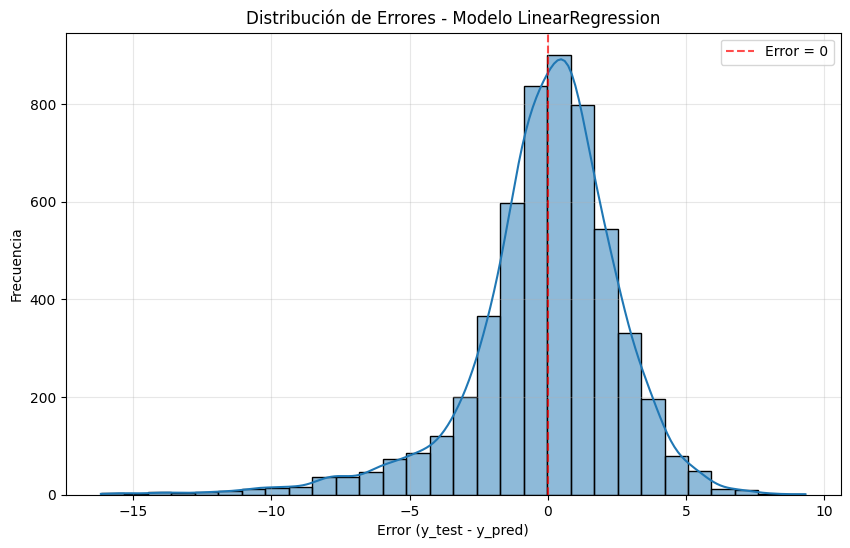

Estadísticas de error para LinearRegression:
Media: -0.0728
Desviación estándar: 2.6791
Error absoluto medio: 1.9105


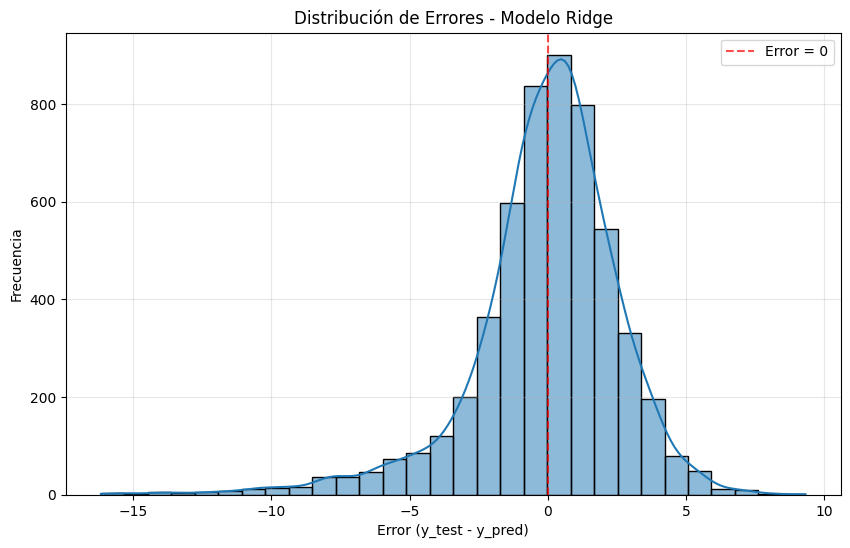

Estadísticas de error para Ridge:
Media: -0.0726
Desviación estándar: 2.6791
Error absoluto medio: 1.9105


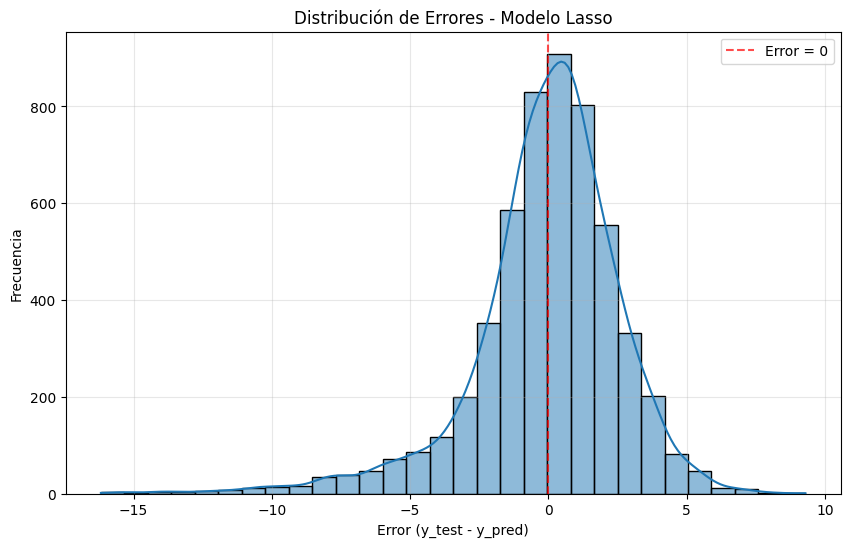

Estadísticas de error para Lasso:
Media: -0.0647
Desviación estándar: 2.6774
Error absoluto medio: 1.9091


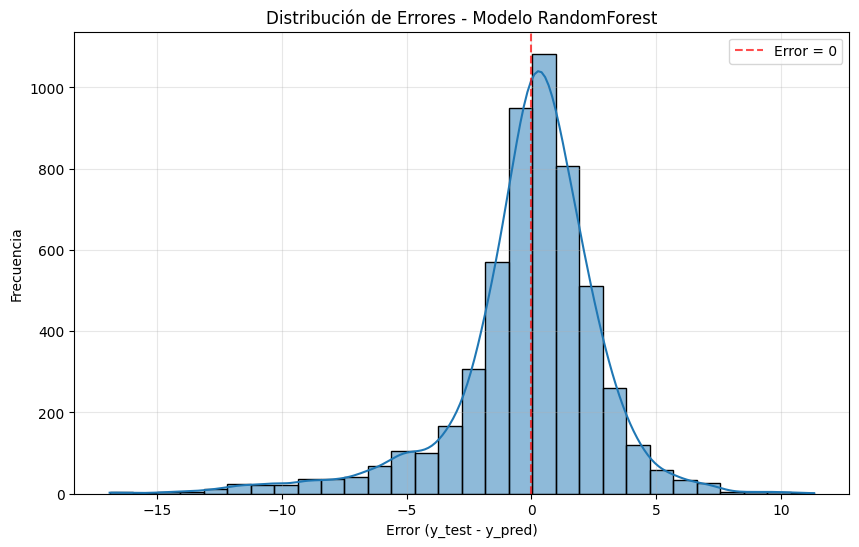

Estadísticas de error para RandomForest:
Media: -0.1192
Desviación estándar: 2.9366
Error absoluto medio: 1.9995


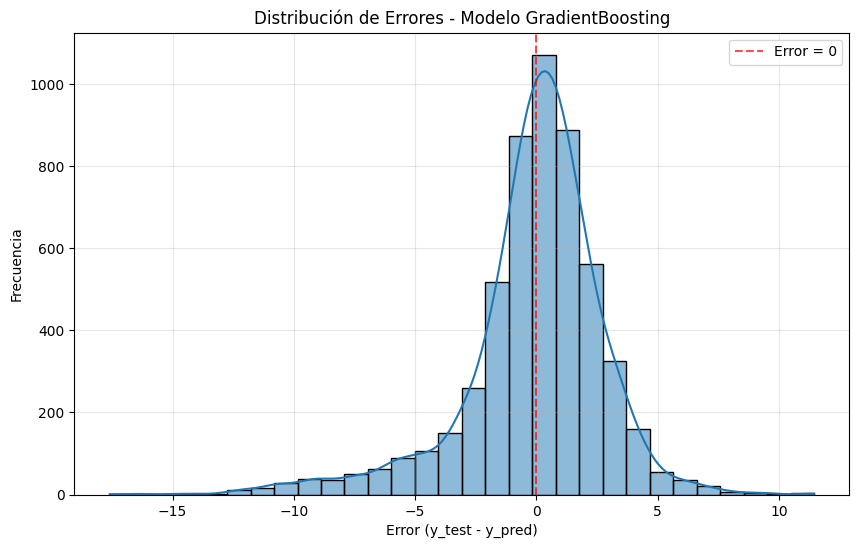

Estadísticas de error para GradientBoosting:
Media: -0.1000
Desviación estándar: 2.9115
Error absoluto medio: 2.0210


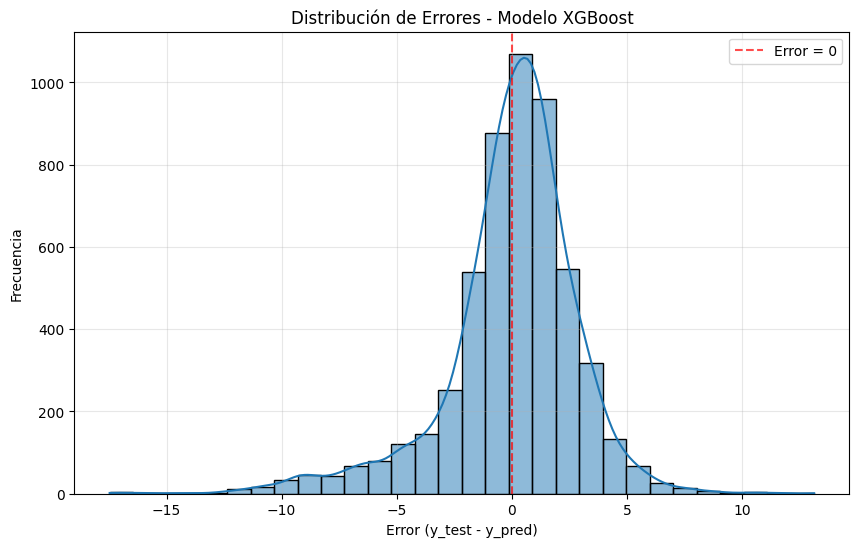

Estadísticas de error para XGBoost:
Media: -0.0125
Desviación estándar: 2.8879
Error absoluto medio: 2.0402


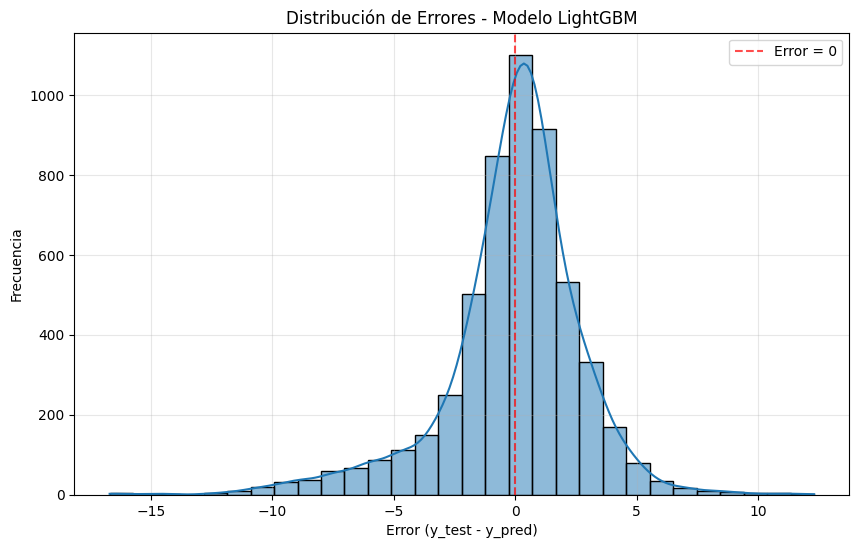

Estadísticas de error para LightGBM:
Media: -0.1027
Desviación estándar: 2.8309
Error absoluto medio: 1.9796


In [25]:
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    diferencias = y_test - y_pred
    
    # Crear el histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(diferencias, kde=True, bins=30)
    plt.title(f'Distribución de Errores - Modelo {nombre}')
    plt.xlabel('Error (y_test - y_pred)')
    plt.ylabel('Frecuencia')
    plt.axvline(x=0, color='r', linestyle='--', alpha=0.7, label='Error = 0')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    
    # También puedes imprimir algunas estadísticas
    print(f"Estadísticas de error para {nombre}:")
    print(f"Media: {diferencias.mean():.4f}")
    print(f"Desviación estándar: {diferencias.std():.4f}")
    print(f"Error absoluto medio: {abs(diferencias).mean():.4f}")

In [27]:
import numpy as np

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    diferencias = y_test - y_pred
    errores_absolutos = np.abs(diferencias)
    
    # Calcular porcentajes para diferentes umbrales
    umbrales = [1, 2, 3, 4]
    
    print(f"\n--- Porcentajes de error para modelo {nombre} ---")
    print(f"Total de predicciones: {len(errores_absolutos)}")
    print("-" * 50)
    
    for umbral in umbrales:
        porcentaje = (errores_absolutos < umbral).mean() * 100
        conteo = (errores_absolutos < umbral).sum()
        print(f"Error < {umbral}: {porcentaje:.2f}% ({conteo}/{len(errores_absolutos)})")
    
    # Estadísticas adicionales útiles
    print("-" * 50)
    print(f"Error absoluto medio (MAE): {errores_absolutos.mean():.4f}")
    print(f"Error máximo: {errores_absolutos.max():.4f}")
    print(f"Error mínimo: {errores_absolutos.min():.4f}")
    print(f"Desviación estándar del error: {errores_absolutos.std():.4f}")


--- Porcentajes de error para modelo LinearRegression ---
Total de predicciones: 5379
--------------------------------------------------
Error < 1: 38.30% (2060/5379)
Error < 2: 65.07% (3500/5379)
Error < 3: 81.17% (4366/5379)
Error < 4: 89.64% (4822/5379)
--------------------------------------------------
Error absoluto medio (MAE): 1.9105
Error máximo: 16.1720
Error mínimo: 0.0002
Desviación estándar del error: 1.8794

--- Porcentajes de error para modelo Ridge ---
Total de predicciones: 5379
--------------------------------------------------
Error < 1: 38.30% (2060/5379)
Error < 2: 65.07% (3500/5379)
Error < 3: 81.17% (4366/5379)
Error < 4: 89.64% (4822/5379)
--------------------------------------------------
Error absoluto medio (MAE): 1.9105
Error máximo: 16.1722
Error mínimo: 0.0002
Desviación estándar del error: 1.8794

--- Porcentajes de error para modelo Lasso ---
Total de predicciones: 5379
--------------------------------------------------
Error < 1: 38.33% (2062/5379)
Erro